In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [24]:

# Lista de arquivos e os nomes desejados para os DataFrames
arquivos = {
    "Área colhida temporária 1999-2020.csv": "df_colhida",
    "Área plantada temporária 1999-2020.csv": "df_plantada",
    "PIB 1999-2020.csv": "df_pib",
    "Valor de Produção 1999-2020.csv": "df_producao"
}

# Lista dos estados que queremos manter
estados_filtrados = ["Acre", "Amazonas", "Amapá", "Maranhão", "Pará", "Roraima", "Tocantins", "Rondônia", "Mato Grosso"]

# Configurar Pandas para exibir números inteiros completos
pd.options.display.float_format = '{:.0f}'.format  

# Criar variáveis para armazenar os DataFrames
for arquivo, nome_df in arquivos.items():
    try:
        # Ler CSV com separador ',' e ignorar a primeira linha
        df = pd.read_csv(arquivo, encoding="utf-8", sep=",", skiprows=1)

        # Normalizar os nomes das colunas (remover espaços extras)
        df.columns = df.columns.str.strip()

        # Remover colunas "Código" e "Sigla", se existirem
        colunas_para_remover = [col for col in ["Código", "Sigla"] if col in df.columns]
        if colunas_para_remover:
            df = df.drop(columns=colunas_para_remover)
            print(f"🗑️ Colunas removidas de {nome_df}: {colunas_para_remover}")

        # Filtrar os estados desejados
        if "Estado" in df.columns:
            df = df[df["Estado"].isin(estados_filtrados)]
            print(f"🌎 Filtrados apenas os estados desejados em {nome_df}")

        # Remover a última coluna do DataFrame
        df = df.iloc[:, :-1]  # Exclui a última coluna
        print(f"🗑️ Última coluna removida de {nome_df}")

        # Armazenar na variável correta
        globals()[nome_df] = df
        print(f"✔ {arquivo} carregado como {nome_df}")
        
    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Exibir quais DataFrames foram carregados
print("\n📂 DataFrames disponíveis:", list(arquivos.values()))

🗑️ Colunas removidas de df_colhida: ['Código', 'Sigla']
🌎 Filtrados apenas os estados desejados em df_colhida
🗑️ Última coluna removida de df_colhida
✔ Área colhida temporária 1999-2020.csv carregado como df_colhida
🗑️ Colunas removidas de df_plantada: ['Código', 'Sigla']
🌎 Filtrados apenas os estados desejados em df_plantada
🗑️ Última coluna removida de df_plantada
✔ Área plantada temporária 1999-2020.csv carregado como df_plantada
🗑️ Colunas removidas de df_pib: ['Código', 'Sigla']
🌎 Filtrados apenas os estados desejados em df_pib
🗑️ Última coluna removida de df_pib
✔ PIB 1999-2020.csv carregado como df_pib
🗑️ Colunas removidas de df_producao: ['Código', 'Sigla']
🌎 Filtrados apenas os estados desejados em df_producao
🗑️ Última coluna removida de df_producao
✔ Valor de Produção 1999-2020.csv carregado como df_producao

📂 DataFrames disponíveis: ['df_colhida', 'df_plantada', 'df_pib', 'df_producao']


In [25]:
df_producao.head()    # Dados de Área Colhida

,Estado,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Acre,280901,313605,239927,269827,305032,233521,254468,192954,114561,...,372323,370197,448795,486966,376911,367735,314997,267882,238250,232947
2,Amazonas,623336,585857,659140,825305,695457,597087,626954,631618,262868,...,964454,946383,1051915,938470,933412,1049191,1053091,946496,946321,843171
3,Amapá,54019,57613,65246,92653,51878,69499,81296,104224,62853,...,133646,136851,108230,140603,122613,116809,128273,97938,96433,88955
9,Maranhão,1174349,1236926,1460514,1706625,2184801,2278222,2013958,1685441,818742,...,2659314,2489157,2834017,3263726,2665344,1858847,2574360,2896230,2783955,4097172
12,Mato Grosso,6462378,8505358,8920744,12022625,16952123,22973491,19042819,10597885,6298685,...,19851288,22238156,22986418,25076410,25213036,27721972,26547353,29377289,32788208,41799931


In [4]:
df_plantada.head()    # Dados de Área Plantada

,Estado,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Acre,81922,93973,91952,97794,97091,115864,117634,111638,107877,...,121043,135180,118489,110554,103290,94552,87101,72431,69230,69521
3,Amapá,6952,8602,12680,12791,12107,13056,14734,14309,15656,...,22076,20925,24280,39384,30878,34078,38863,34238,34800,36141
9,Maranhão,1151222,1213901,1255056,1295759,1413738,1520015,1605736,1608870,1620345,...,1751843,1795760,1845490,1975258,1802598,1571680,1783013,1796133,1701124,1699974
12,Mato Grosso,4353762,4746968,4882136,5632992,6445164,7912796,8976694,8009276,7992055,...,9884223,11262263,12723490,13542011,14082687,14494519,15570194,15478806,16594186,17150016
13,Pará,1142087,1129737,946898,891509,990071,1028444,1061815,983007,950688,...,795974,818833,863784,921991,990298,1044728,1162676,1127425,1198602,1316338


In [17]:
pd.options.display.float_format = '{:.2f}'.format  # Exibe com duas casas decimais

df_producao.head()  # Dados de Valor de Produção Agrícola

,Estado,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Acre,280900.59,313604.57,239926.84,269826.59,305032.27,233521.04,254467.85,192953.69,114561.48,...,372322.97,370196.58,448795.13,486965.64,376911.33,367735.34,314997.15,267881.59,238250.49,232947.25
2,Amazonas,623336.20,585857.05,659139.66,825304.66,695456.59,597086.94,626954.35,631618.26,262868.02,...,964454.00,946383.49,1051914.54,938469.52,933412.40,1049191.38,1053091.09,946496.39,946321.32,843171.23
3,Amapá,54019.05,57613.08,65246.48,92652.50,51878.30,69499.22,81295.59,104223.61,62853.41,...,133646.49,136850.51,108230.11,140603.34,122612.77,116808.51,128273.36,97938.16,96433.03,88954.98
9,Maranhão,1174349.20,1236925.88,1460513.74,1706625.23,2184801.32,2278222.07,2013957.85,1685441.12,818741.97,...,2659313.55,2489157.01,2834016.76,3263726.39,2665343.97,1858846.93,2574359.60,2896230.10,2783955.28,4097171.93
12,Mato Grosso,6462377.66,8505358.41,8920744.06,12022624.80,16952122.93,22973491.10,19042819.44,10597884.56,6298684.62,...,19851288.28,22238156.43,22986418.48,25076410.27,25213035.59,27721972.02,26547353.03,29377288.65,32788208.27,41799931.48


In [38]:
df_pib.head()   # Dados do PIB Estadual

,Estado,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Acre,1866542,2154284,2475169,2971301,3377234,3784003,4300581,4661807,5458172,...,8949434,10137925,11473930,13458698,13622802,13754240,14272941,15331123,15630017,16476371
2,Amazonas,13933920,16749755,18050377,22093338,25862134,31090696,33980877,39933213,43479773,...,70734401,72242701,83051233,86668644,86568184,89039782,93240191,100109235,108181091,116019139
3,Amapá,2128307,2357036,2801925,3173343,3413195,3824740,4306410,5280822,6012523,...,9409228,11130868,12763486,13400284,13861293,14342135,15481908,16795207,17496661,18469115
9,Maranhão,10308256,11908912,13419658,15924003,19502900,22127132,25104209,29710643,30730866,...,52143535,60490109,67694845,76842028,78475994,85310038,89542757,98179496,97339938,106915962
12,Mato Grosso,12364905,14870533,16309976,19190653,26697097,33388670,34257055,30700165,38027578,...,69153957,79665691,89212919,101234520,107418319,123880296,126845898,137442853,142122028,178649564


# EDA

## df_pib

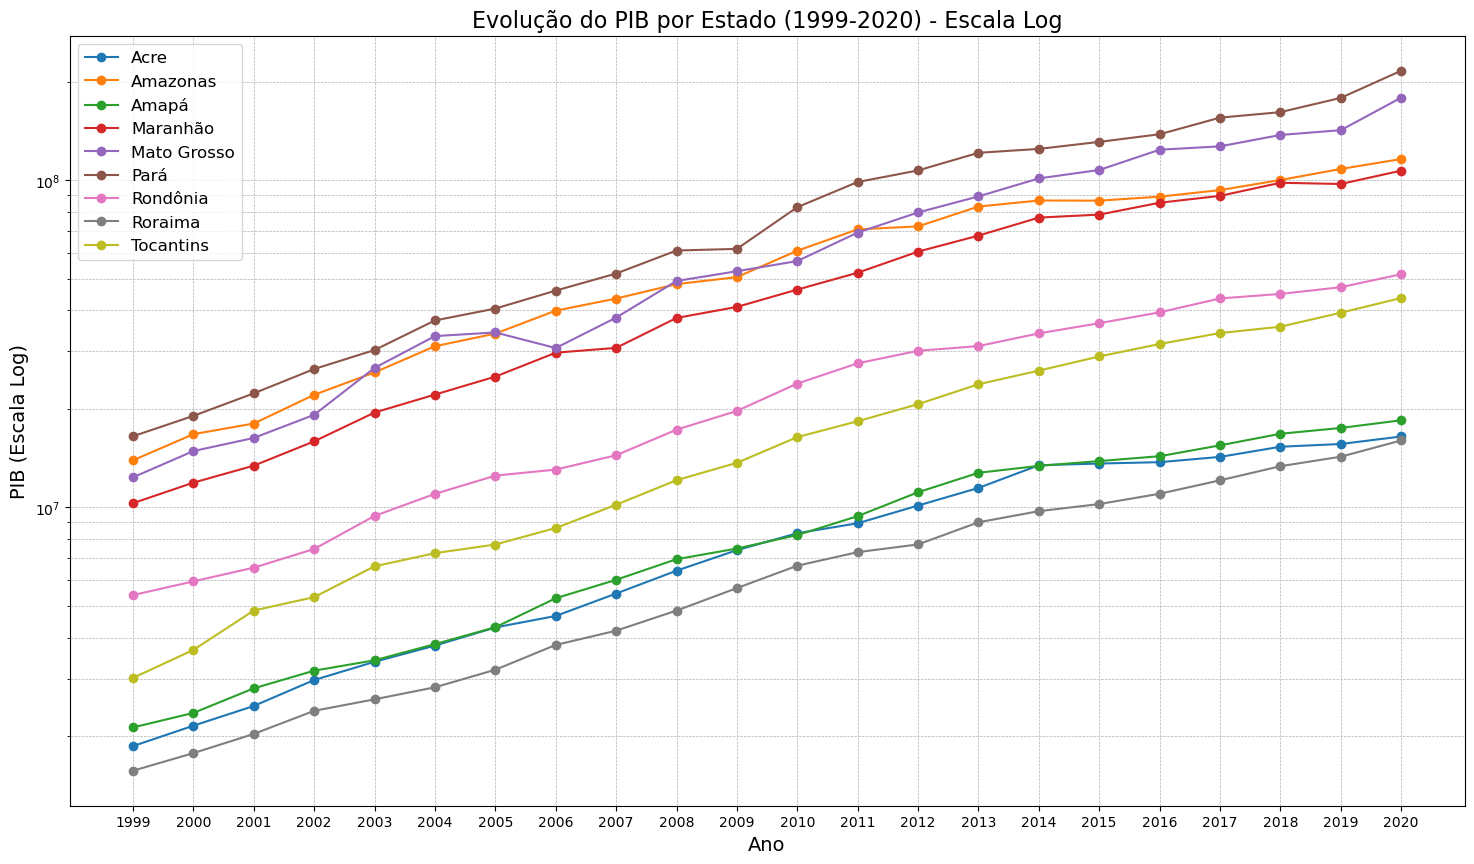

In [41]:
# Lista de anos como strings (caso os anos sejam os mesmos do df_producao)
anos_str = [str(year) for year in range(1999, 2021)]

# Criar um gráfico de linhas para visualizar os valores reais do PIB por estado ao longo dos anos
plt.figure(figsize=(18, 10))

for estado in df_pib["Estado"].unique():
    dados_estado = df_pib[df_pib["Estado"] == estado][anos_str].iloc[0]  # Pega os valores diretamente
    plt.plot(anos_str, dados_estado, marker='o', linestyle='-', label=estado)

plt.xlabel("Ano", fontsize=14)
plt.ylabel("PIB (Escala Log)", fontsize=14)
plt.title("Evolução do PIB por Estado (1999-2020) - Escala Log", fontsize=16)
plt.legend(fontsize=12, loc="best")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Ajustar a escala do eixo Y para log base 10
plt.yscale('log')

# Exibir o gráfico
plt.show()

## df_producao

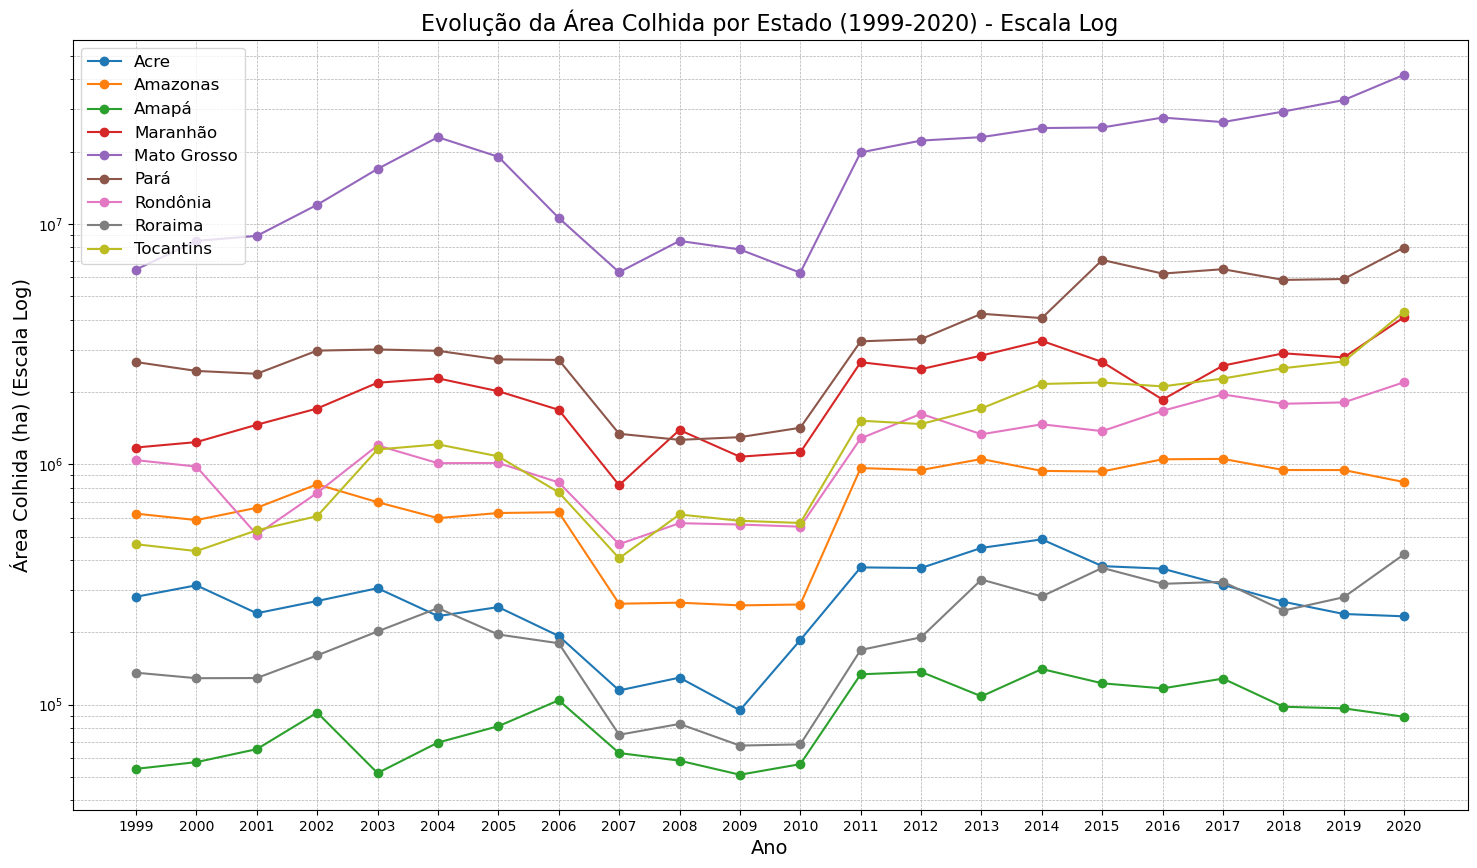

In [39]:
# Criar um gráfico de linhas para visualizar os valores reais da área colhida por estado ao longo dos anos
plt.figure(figsize=(18, 10))

for estado in df_producao["Estado"].unique():
    dados_estado = df_producao[df_producao["Estado"] == estado][anos_str].iloc[0]  # Pega os valores diretamente
    plt.plot(anos_str, dados_estado, marker='o', linestyle='-', label=estado)

plt.xlabel("Ano", fontsize=14)
plt.ylabel("Área Colhida (ha) (Escala Log)", fontsize=14)
plt.title("Evolução da Área Colhida por Estado (1999-2020) - Escala Log", fontsize=16)
plt.legend(fontsize=12, loc="best")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Ajustar a escala do eixo Y para log base 10
plt.yscale('log')

# Exibir o gráfico
plt.show()

## df_colhida

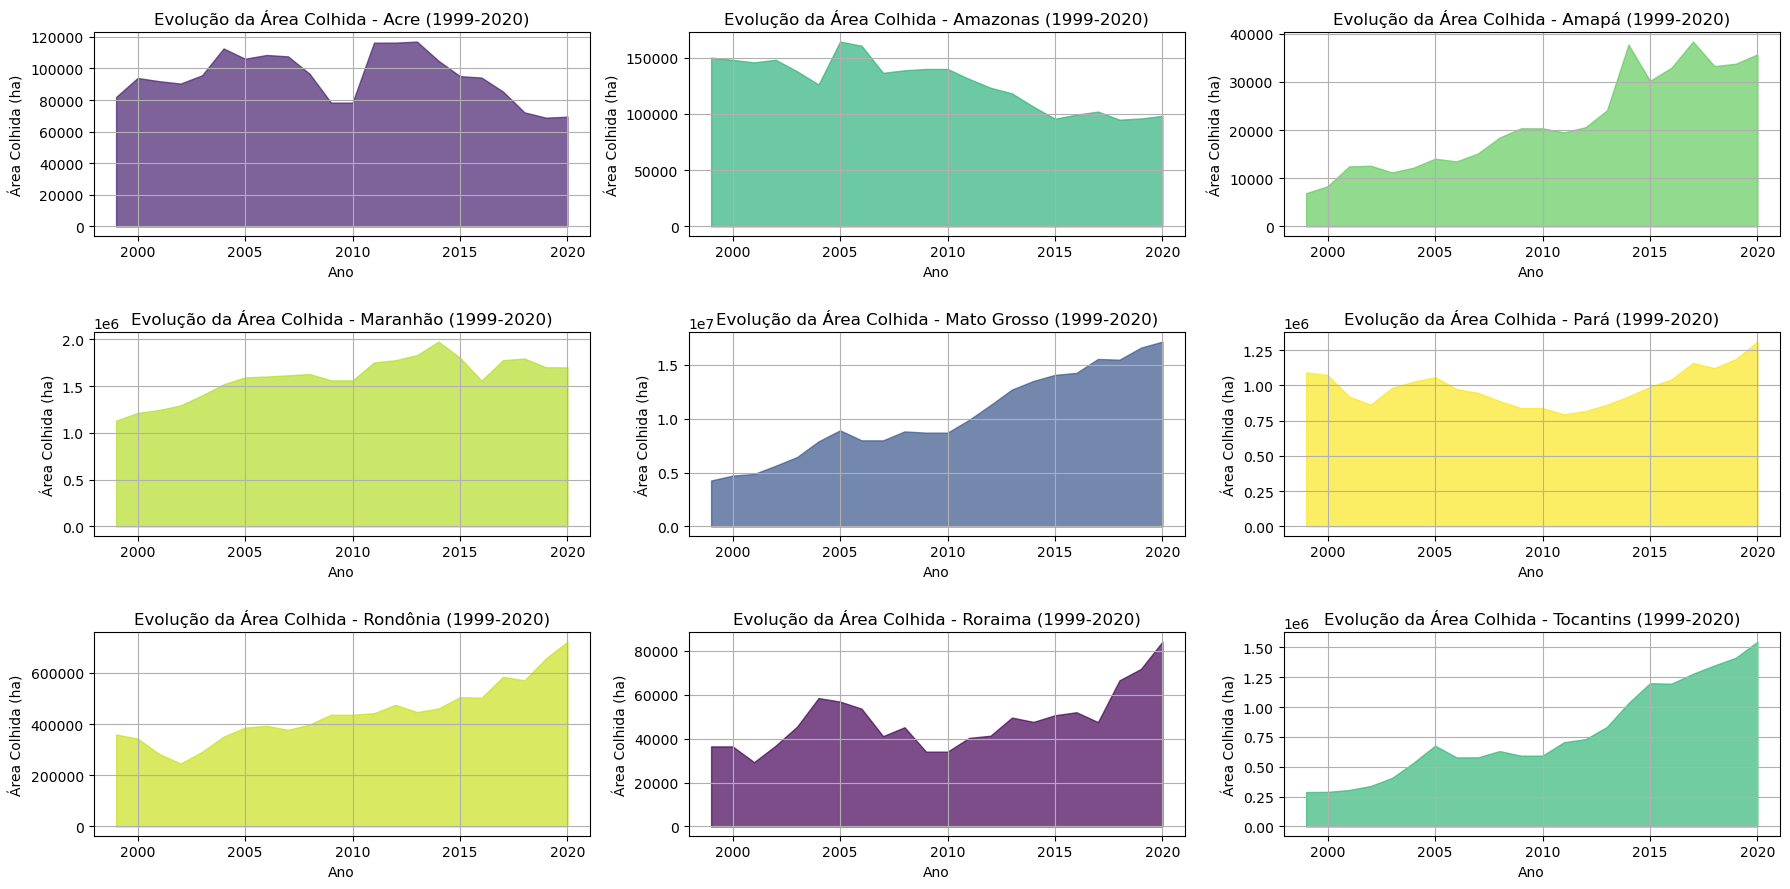

In [40]:
# Converter anos para formato numérico
df_long = df_colhida.melt(id_vars=["Estado"], var_name="Ano", value_name="Area_Colhida")
df_long["Ano"] = pd.to_numeric(df_long["Ano"], errors="coerce")
df_long["Area_Colhida"] = pd.to_numeric(df_long["Area_Colhida"], errors="coerce")

# Criar gráficos separados por estado
estados = df_long["Estado"].unique()
num_estados = len(estados)
cols = 3  # Número de colunas desejado
rows = -(-num_estados // cols)  # Cálculo para determinar o número de linhas
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 3))
axes = axes.flatten()

for i, estado in enumerate(estados):
    subset = df_long[df_long["Estado"] == estado]
    
    axes[i].fill_between(subset["Ano"], subset["Area_Colhida"], alpha=0.7, color=plt.cm.viridis(hash(estado) % 256 / 256))
    axes[i].set_xlabel("Ano")
    axes[i].set_ylabel("Área Colhida (ha)")
    axes[i].set_title(f"Evolução da Área Colhida - {estado} (1999-2020)")
    axes[i].grid(True)
    
plt.tight_layout()
plt.show()


## df_plantada

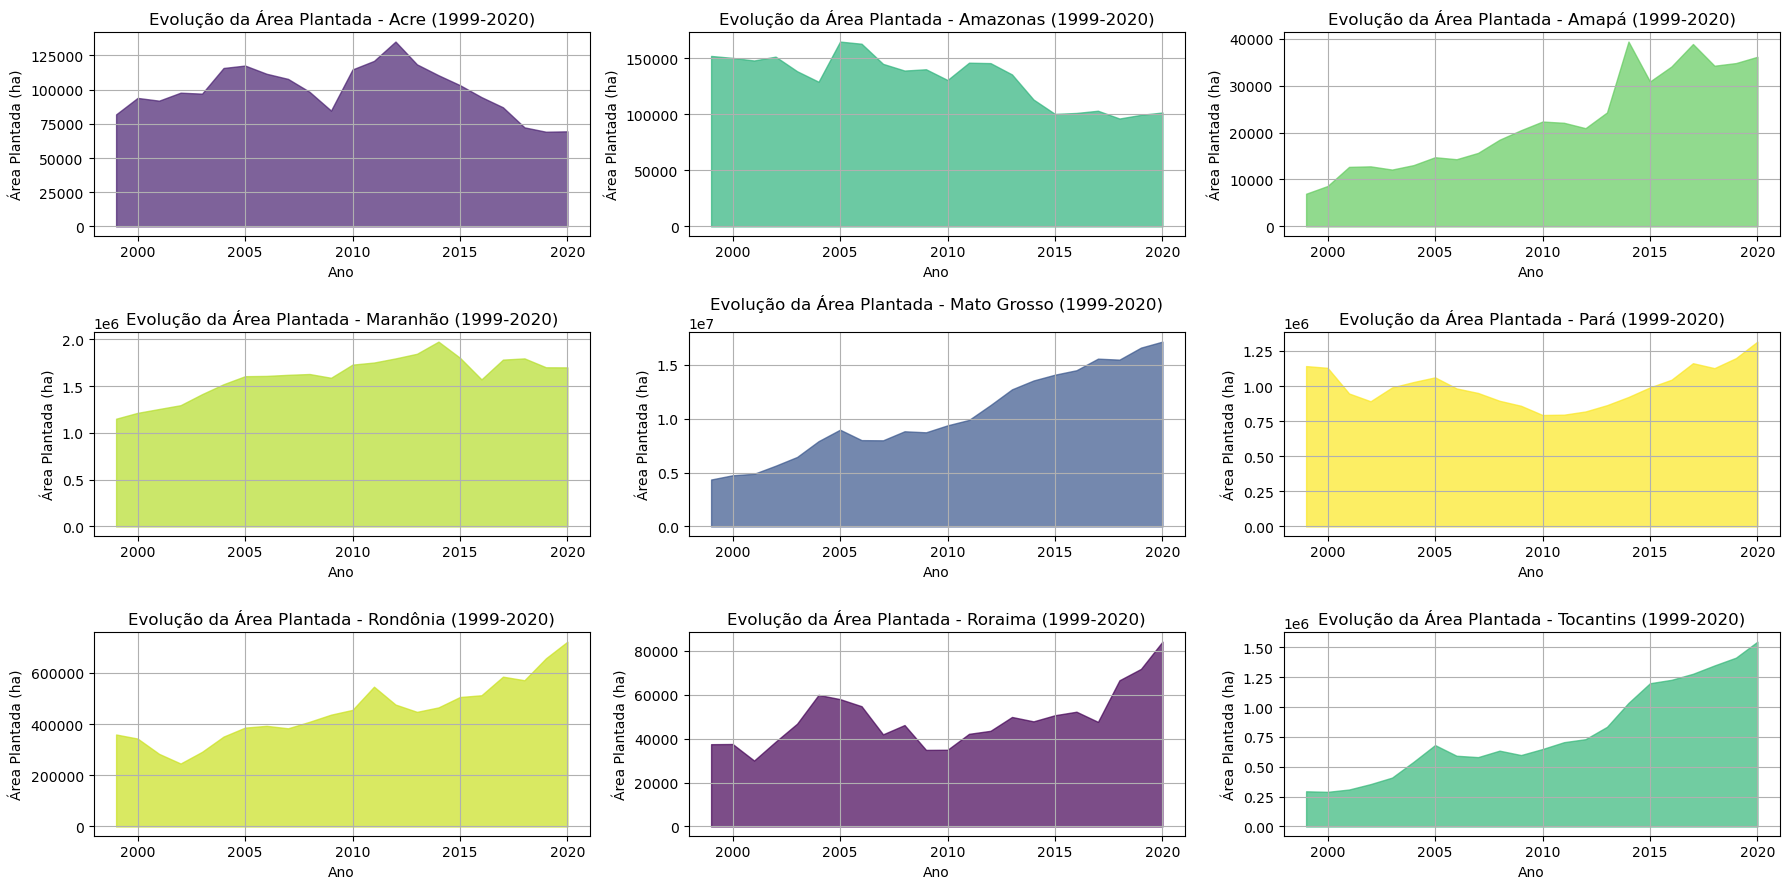

In [37]:
# Converter anos para formato numérico
df_long_plantada = df_plantada.melt(id_vars=["Estado"], var_name="Ano", value_name="Area_Plantada")
df_long_plantada["Ano"] = pd.to_numeric(df_long_plantada["Ano"], errors="coerce")
df_long_plantada["Area_Plantada"] = pd.to_numeric(df_long_plantada["Area_Plantada"], errors="coerce")

# Criar gráficos separados por estado
estados = df_long_plantada["Estado"].unique()
num_estados = len(estados)
cols = 3  # Número de colunas desejado
rows = -(-num_estados // cols)  # Cálculo para determinar o número de linhas
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 3))
axes = axes.flatten()

for i, estado in enumerate(estados):
    subset = df_long_plantada[df_long_plantada["Estado"] == estado]
    
    axes[i].fill_between(subset["Ano"], subset["Area_Plantada"], alpha=0.7, color=plt.cm.viridis(hash(estado) % 256 / 256))
    axes[i].set_xlabel("Ano")
    axes[i].set_ylabel("Área Plantada (ha)")
    axes[i].set_title(f"Evolução da Área Plantada - {estado} (1999-2020)")
    axes[i].grid(True)
    
plt.tight_layout()
plt.show()


# Normalização

In [7]:
# Criar o normalizador
scaler = MinMaxScaler()

# Normalizar cada DataFrame sem dicionário
for nome_df in ["df_colhida", "df_plantada", "df_pib", "df_producao"]:
    df = globals()[nome_df]  # Recupera o DataFrame original
    
    # Seleciona apenas colunas numéricas para normalizar
    colunas_numericas = df.select_dtypes(include=["number"]).columns

    if colunas_numericas.empty:
        print(f"⚠️ {nome_df} não possui colunas numéricas para normalizar.")
        continue

    # Aplica a normalização Min-Max
    df_normalizado = df.copy()
    df_normalizado[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

    # Criar uma nova variável global para armazenar a versão normalizada
    globals()[f"{nome_df}_norm"] = df_normalizado

    print(f"✔ {nome_df} normalizado e armazenado como {nome_df}_norm")

# Exibir os nomes dos DataFrames normalizados
print("\n📂 DataFrames normalizados disponíveis:")
print("df_colhida_norm, df_plantada_norm, df_pib_norm, df_producao_norm")


✔ df_colhida normalizado e armazenado como df_colhida_norm
✔ df_plantada normalizado e armazenado como df_plantada_norm
✔ df_pib normalizado e armazenado como df_pib_norm
✔ df_producao normalizado e armazenado como df_producao_norm

📂 DataFrames normalizados disponíveis:
df_colhida_norm, df_plantada_norm, df_pib_norm, df_producao_norm


In [8]:
df_colhida_norm

,Estado,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Acre,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Amapá,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Maranhão,0.26,0.26,0.25,0.23,0.22,0.19,0.18,0.20,0.20,...,0.18,0.16,0.14,0.14,0.13,0.11,0.11,0.11,0.10,0.10
12,Mato Grosso,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
13,Pará,0.26,0.23,0.19,0.15,0.15,0.13,0.12,0.12,0.12,...,0.08,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
20,Rondônia,0.08,0.07,0.06,0.04,0.04,0.04,0.04,0.05,0.05,...,0.04,0.04,0.03,0.03,0.03,0.03,0.04,0.03,0.04,0.04
21,Roraima,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26,Tocantins,0.07,0.06,0.06,0.06,0.06,0.07,0.07,0.07,0.07,...,0.07,0.06,0.06,0.07,0.08,0.08,0.08,0.09,0.08,0.09


In [9]:
df_plantada_norm

,Estado,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Acre,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00
3,Amapá,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Maranhão,0.26,0.25,0.26,0.23,0.22,0.19,0.18,0.20,0.20,...,0.18,0.16,0.14,0.14,0.13,0.11,0.11,0.11,0.10,0.10
12,Mato Grosso,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
13,Pará,0.26,0.24,0.19,0.16,0.15,0.13,0.12,0.12,0.12,...,0.08,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
20,Rondônia,0.08,0.07,0.06,0.04,0.04,0.04,0.04,0.05,0.05,...,0.05,0.04,0.03,0.03,0.03,0.03,0.04,0.03,0.04,0.04
21,Roraima,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26,Tocantins,0.07,0.06,0.06,0.06,0.06,0.07,0.07,0.07,0.07,...,0.07,0.06,0.06,0.07,0.08,0.08,0.08,0.09,0.08,0.09


In [10]:
df_pib_norm

,Estado,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Acre,0.02,0.02,0.02,0.02,0.03,0.03,0.03,0.02,0.03,...,0.02,0.02,0.02,0.03,0.03,0.02,0.02,0.01,0.01,0.00
3,Amapá,0.04,0.03,0.04,0.03,0.03,0.03,0.03,0.04,0.04,...,0.02,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.01
9,Maranhão,0.59,0.59,0.56,0.56,0.61,0.56,0.59,0.61,0.56,...,0.49,0.53,0.52,0.58,0.57,0.58,0.54,0.57,0.51,0.45
12,Mato Grosso,0.72,0.76,0.70,0.70,0.87,0.89,0.83,0.64,0.71,...,0.68,0.72,0.71,0.80,0.81,0.89,0.80,0.84,0.78,0.81
13,Pará,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
20,Rondônia,0.26,0.24,0.22,0.21,0.25,0.24,0.25,0.22,0.21,...,0.22,0.23,0.20,0.21,0.22,0.22,0.22,0.21,0.20,0.18
21,Roraima,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26,Tocantins,0.10,0.11,0.14,0.12,0.15,0.13,0.12,0.12,0.13,...,0.12,0.13,0.13,0.14,0.15,0.16,0.15,0.15,0.15,0.14


In [11]:
df_producao_norm

,Estado,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Acre,0.04,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00
3,Amapá,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Maranhão,0.17,0.14,0.16,0.14,0.13,0.10,0.10,0.15,0.12,...,0.13,0.11,0.12,0.13,0.10,0.06,0.09,0.10,0.08,0.10
12,Mato Grosso,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
13,Pará,0.41,0.28,0.26,0.24,0.17,0.13,0.14,0.25,0.20,...,0.16,0.14,0.18,0.16,0.28,0.22,0.24,0.20,0.18,0.19
20,Rondônia,0.15,0.11,0.05,0.06,0.07,0.04,0.05,0.07,0.06,...,0.06,0.07,0.05,0.05,0.05,0.06,0.07,0.06,0.05,0.05
21,Roraima,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,...,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
26,Tocantins,0.06,0.04,0.05,0.04,0.07,0.05,0.05,0.06,0.06,...,0.07,0.06,0.07,0.08,0.08,0.07,0.08,0.08,0.08,0.10
